In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/weather_classification_data.csv")
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [4]:
# Basic Info

print("Shape of Data:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)

Shape of Data: (13200, 11)

Column Names:
 Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

Data Types:
 Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object


In [5]:
# Missing Values

print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [6]:
# Duplicate Rows

print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [7]:
# Descriptive Statistics

print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
         Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000

In [8]:
# Value Counts (Categorical Columns)

print("\nSeason Value Counts:\n", df['Season'].value_counts())
print("\nLocation Value Counts:\n", df['Location'].value_counts())
print("\nWeather Type Value Counts:\n", df['Weather Type'].value_counts())


Season Value Counts:
 Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

Location Value Counts:
 Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

Weather Type Value Counts:
 Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


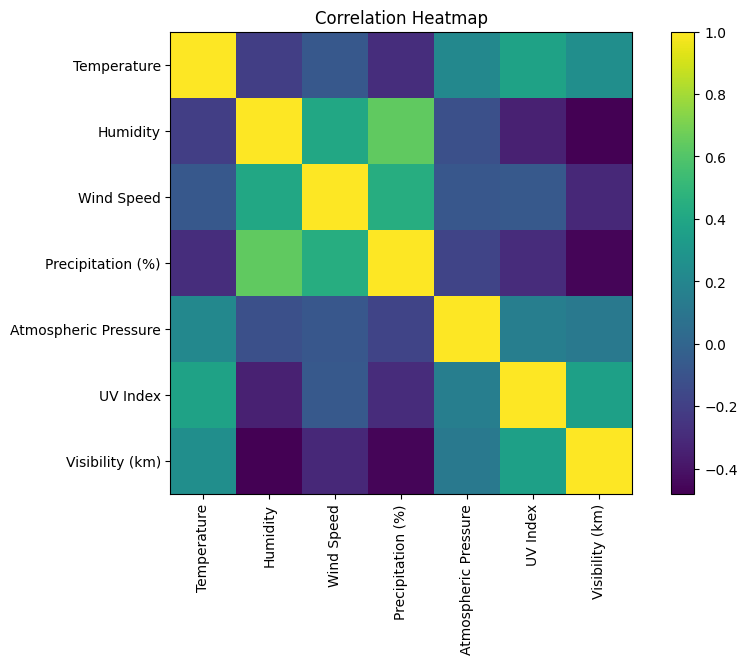

In [10]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.imshow(corr_matrix, interpolation='nearest')
plt.title("Correlation Heatmap")
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()

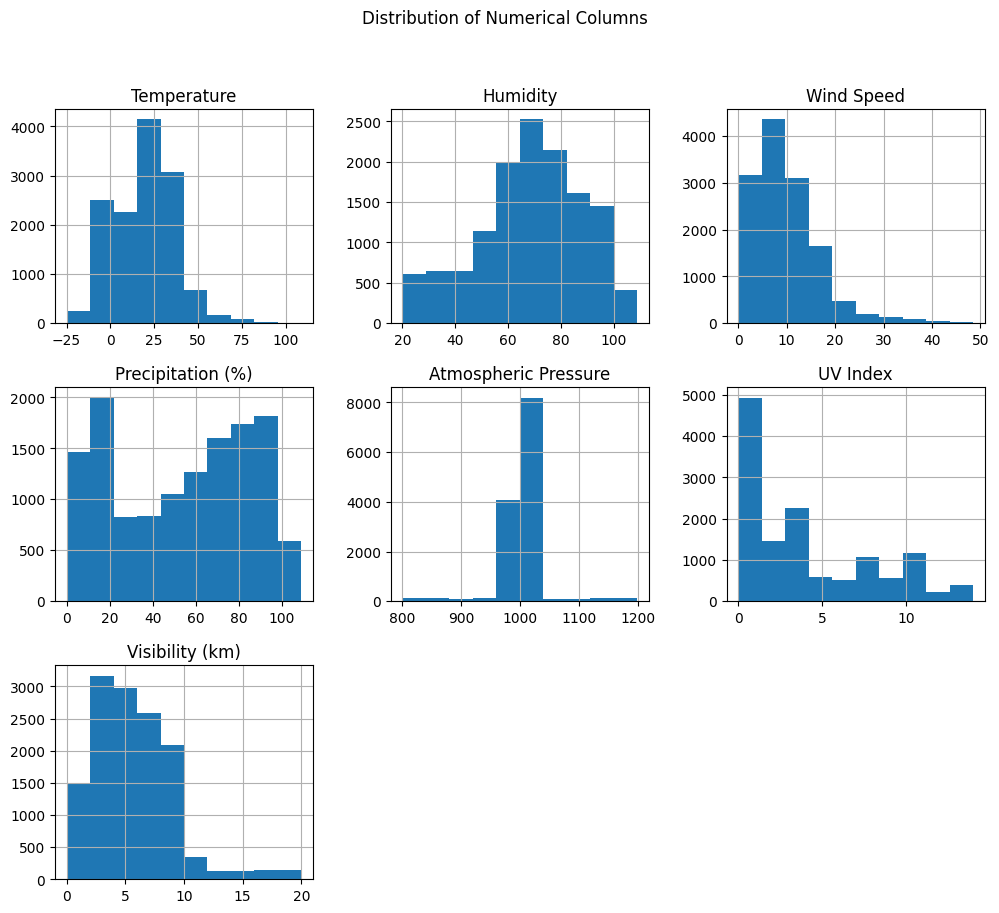

In [11]:
# Histogram of Numerical Columns

df.hist(figsize=(12,10))
plt.suptitle("Distribution of Numerical Columns")
plt.show()

<Figure size 800x500 with 0 Axes>

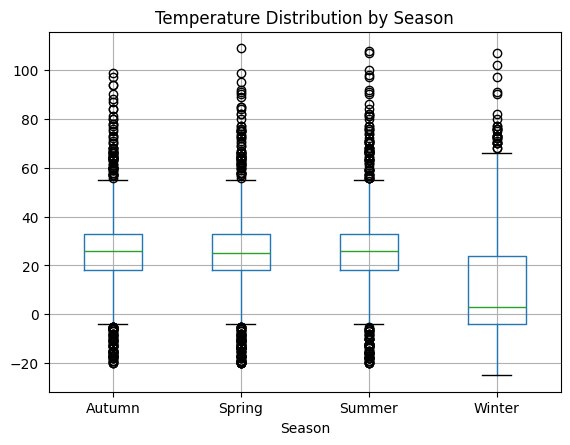

In [12]:
# Season-wise Temperature Boxplot

plt.figure(figsize=(8,5))
df.boxplot(column="Temperature", by="Season")
plt.title("Temperature Distribution by Season")
plt.suptitle("")
plt.show()

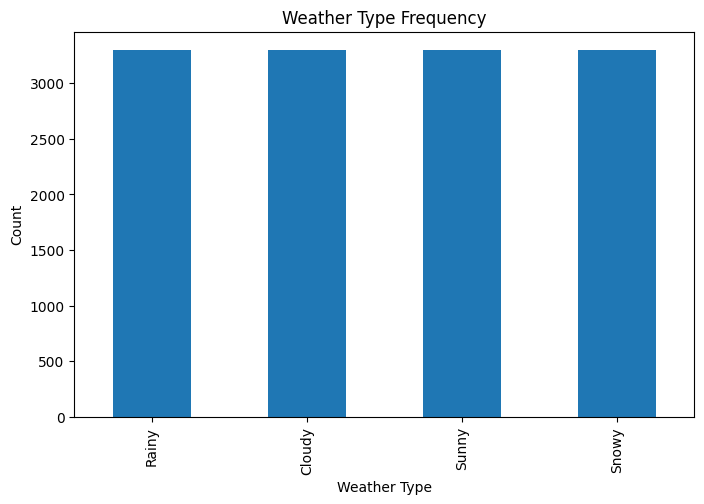

In [13]:
# Weather Type Count Plot

df['Weather Type'].value_counts().plot(kind='bar', figsize=(8,5))
plt.title("Weather Type Frequency")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.show()